In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
#Busco a traves del peso y la altura de una persona, determinar si es adulto o no.

data = [(175,70,1), (179,67,1), (184,86,1), (80,40,0),
        (20,10,0), (40,15,0), (165,62,1),(100,42,0)] #Condicion. Los dos mayores a 0.65

df = pd.DataFrame(data, columns = ['altura','peso', 'adulto']) 

columns_to_scale = ['altura', 'peso']

# Escalo las variables, sino el perceptron clasificaba mal
scaler = StandardScaler()

ct = ColumnTransformer(
    [('scaler', scaler, columns_to_scale)],
    remainder='passthrough'
)

scaled_columns = ct.fit_transform(df)


scaled_df = pd.DataFrame(scaled_columns, columns=df.columns)

X = scaled_df[['altura','peso']]
y = scaled_df['adulto'].astype(int)

X_unsc = df[['altura','peso']]
y_unsc = df['adulto'].astype(int)

scaled_df

,altura,peso,adulto
0,0.917813,0.830910,1.0
1,0.982080,0.712208,1.0
2,1.062414,1.463984,1.0
3,-0.608528,-0.356104,0.0
4,-1.572533,-1.543118,0.0
5,-1.251198,-1.345282,0.0
6,0.757146,0.514373,1.0
7,-0.287193,-0.276970,0.0


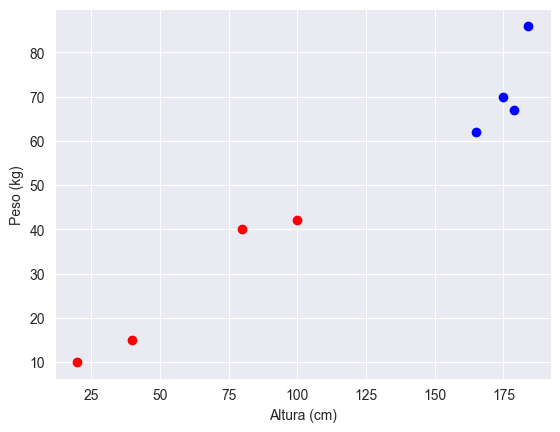

In [16]:
df_positivos = df[df['adulto'] == 1]
df_negativos = df[df['adulto'] == 0]

plt.scatter(df_positivos['altura'], df_positivos['peso'], color = 'blue')
plt.scatter(df_negativos['altura'],df_negativos['peso'], color = 'red')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

In [17]:
perceptron = Perceptron()
perceptron.fit(X, y)

Perceptron()

In [18]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(X)
accuracy_score(y, y_pred)

1.0

C:\Users\agusd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


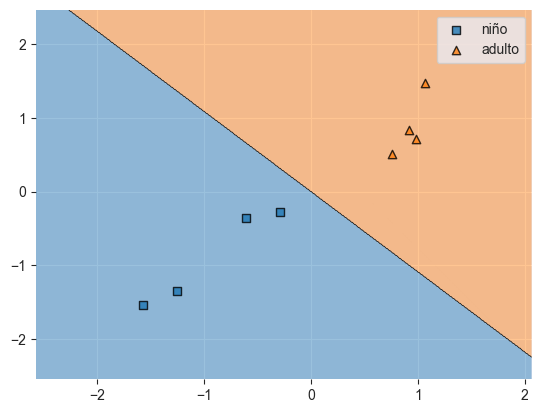

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X),np.array(y),perceptron)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['niño', 'adulto'])

plt.show()